Story 5

Historic data indicates that the occurrence and intensity of cyclonic storms (Hurricanes, Typhoons and Tornados) increases with the increased earth temperature. For this assignment you will need to tell this story to a non-technical audience (eg: a high-school earth science class).
Notes:
Source historic data for a period of at least 25 years on a measure of the earth's temperature.

Source data on the occurrence and intensity of hurricanes, typhoons and tornados for the same historic period.

Perform the data analysis to establish the correlations between earth temperature and storm occurrence and intensity.

Tell the story of this data and your analysis using data visualizations and other illustrations (eg: pictures of storm damage) in a presentation that will be accessible to a high-school earth science class.

This assignment is due at the end of the week ten of the semester.

1. Source data on past 25 years for typhoons, hurricanes, and tornados
2. Source data on global temperature

Over time show how these variables interact:
- number of storms
- temperature of earth
- cost in damage


In [2]:
import pandas as pd
#https://www.nasa.gov/stem-content/global-land-ocean-temperature-index-data-set
lotemp = pd.read_table(r"data\Land-Ocean Temperature Index (C)_clean.csv", delimiter = ' ')
lotemp = lotemp[lotemp['Year'] >= 1950] #restrict to 1950s and onward
lotemp = lotemp.drop('Lowess_5', axis =1) #drop the lowess reading

lotemp.columns = ['Year','Annual Mean Temp C']

In [3]:
#sea surface temperatures
#https://www.epa.gov/climate-indicators/climate-change-indicators-sea-surface-temperature
sea_temp = pd.read_csv(r"data\sea-surface-temp.csv")
sea_temp = sea_temp.drop(["Lower 95% confidence interval","Upper 95% confidence interval"],axis = 1)
sea_temp.columns = ['Year','Annual Anomaly (F)']

In [4]:
#tropical cyclone intensity
# https://www.epa.gov/climate-indicators/climate-change-indicators-tropical-cyclone-activity

intensity = pd.read_csv(r"data\PDI Cyclone Data.csv")
intensity = intensity.drop("Smoothed SST (F)", axis = 1)
intensity.columns = ['Year','PDI']

In [5]:
#https://public.emdat.be/
storms = pd.read_excel(r"data\Global Storm Counts.xlsx")
storms = storms[["DisNo.","Disaster Type","Disaster Subtype","Magnitude","Magnitude Scale","Total Deaths","Event Name","ISO","Total Damage, Adjusted ('000 US$)"]] #Pull only columns we want
storms = storms[(storms['Disaster Subtype'] == 'Tropical cyclone') | (storms['Disaster Subtype'] == 'Tornado')]
storms

,DisNo.,Disaster Type,Disaster Subtype,Magnitude,Magnitude Scale,Total Deaths,Event Name,ISO,"Total Damage, Adjusted ('000 US$)"
0,1950-0009-ATG,Storm,Tropical cyclone,NaN,Kph,2.0,Dog,ATG,12145.0
1,1950-0010-JPN,Storm,Tropical cyclone,NaN,Kph,509.0,Jane,JPN,NaN
3,1950-0012-CAN,Storm,Tornado,NaN,Kph,NaN,NaN,CAN,NaN
8,1951-0005-COM,Storm,Tornado,NaN,Kph,500.0,NaN,COM,NaN
9,1951-0010-NCL,Storm,Tropical cyclone,NaN,Kph,2.0,NaN,NCL,NaN
...,...,...,...,...,...,...,...,...,...
5147,2023-0526-JPN,Storm,Tropical cyclone,NaN,Kph,NaN,Typhoon 'Lan',JPN,NaN
5149,2023-0559-DOM,Storm,Tropical cyclone,80.0,Kph,3.0,Tropical storm 'Franklin',DOM,NaN
5150,2023-0603-ARG,Storm,Tropical cyclone,NaN,Kph,NaN,NaN,ARG,NaN
5151,2023-0603-BRA,Storm,Tropical cyclone,NaN,Kph,46.0,NaN,BRA,NaN


In [6]:
storms.columns = ["Year","Disaster Type","Disaster Subtype","Magnitude","Magnitude Scale","Total Deaths","Event Name","ISO","Damage in USD"] #Rename columns
storms[["Damage in USD"]] = storms[["Damage in USD"]]*1000 #Original file had it in 1000s of dollars, I multiplied it back in
storms = storms.sort_values("Damage in USD", ascending = False) #sort by cost
storms

,Year,Disaster Type,Disaster Subtype,Magnitude,Magnitude Scale,Total Deaths,Event Name,ISO,Damage in USD
2922,2005-0467-USA,Storm,Tropical cyclone,280.0,Kph,1833.0,Katrina,USA,1.873191e+11
4364,2017-0362-USA,Storm,Tropical cyclone,215.0,Kph,88.0,Hurricane Harvey,USA,1.134230e+11
5042,2022-0614-USA,Storm,Tropical cyclone,240.0,Kph,152.0,Hurricane 'Ian',USA,1.000000e+11
4388,2017-0383-PRI,Storm,Tropical cyclone,240.0,Kph,64.0,Hurricane 'Maria',PRI,8.118700e+10
4888,2021-0551-USA,Storm,Tropical cyclone,240.0,Kph,96.0,Tropical storm 'Ida',USA,7.020182e+10
...,...,...,...,...,...,...,...,...,...
5147,2023-0526-JPN,Storm,Tropical cyclone,NaN,Kph,NaN,Typhoon 'Lan',JPN,NaN
5149,2023-0559-DOM,Storm,Tropical cyclone,80.0,Kph,3.0,Tropical storm 'Franklin',DOM,NaN
5150,2023-0603-ARG,Storm,Tropical cyclone,NaN,Kph,NaN,NaN,ARG,NaN
5151,2023-0603-BRA,Storm,Tropical cyclone,NaN,Kph,46.0,NaN,BRA,NaN


In [7]:
storms["Year"] = storms["Year"].str.slice(0,4)

In [8]:
storms_date = storms
storms_date['Year'] = storms_date['Year'].astype(int) #convert year to datetime
lotemp_date = lotemp
lotemp_date['Year'] = lotemp_date['Year'].astype(int) #convert year to datetime

master = storms_date.merge(lotemp_date, on='Year',how='left')
master = master.merge(intensity, on = 'Year', how = 'left')
pd.set_option('display.max_rows', None)
master

,Year,Disaster Type,Disaster Subtype,Magnitude,Magnitude Scale,Total Deaths,Event Name,ISO,Damage in USD,Annual Mean Temp C,PDI
0,2005,Storm,Tropical cyclone,280.00,Kph,1833.0,Katrina,USA,1.873191e+11,0.67,5.1439
1,2017,Storm,Tropical cyclone,215.00,Kph,88.0,Hurricane Harvey,USA,1.134230e+11,0.92,4.5300
2,2022,Storm,Tropical cyclone,240.00,Kph,152.0,Hurricane 'Ian',USA,1.000000e+11,0.89,NaN
3,2017,Storm,Tropical cyclone,240.00,Kph,64.0,Hurricane 'Maria',PRI,8.118700e+10,0.92,4.5300
4,2021,Storm,Tropical cyclone,240.00,Kph,96.0,Tropical storm 'Ida',USA,7.020182e+10,0.84,NaN
5,2017,Storm,Tropical cyclone,300.00,Kph,97.0,Hurricane 'Irma',USA,6.805381e+10,0.92,4.5300
6,2012,Storm,Tropical cyclone,NaN,Kph,54.0,Hurricane Sandy,USA,6.373315e+10,0.65,2.3420
7,1992,Storm,Tropical cyclone,290.00,Kph,44.0,Andrew,USA,5.527036e+10,0.22,1.3428
8,2008,Storm,Tropical cyclone,200.00,Kph,82.0,Hurricane Ike,USA,4.077819e+10,0.54,2.6936
9,2004,Storm,Tropical cyclone,NaN,Kph,52.0,Ivan,USA,2.788911e+10,0.53,5.5545


## Damage Over Time Graphic
### No Temperature Markers

In [84]:
#plotly version
import plotly.express as px
import plotly.graph_objects as go


grouped = master.groupby('Year').agg({'Damage in USD': 'sum', 'Disaster Type': 'count', 'Annual Mean Temp C': 'first'})
grouped = grouped.rename(columns={'Damage in USD': 'Total Damage', 'Disaster Type': 'Number of Storms', 'Annual Mean Temp C':'Global Temp(C) Change'})

# Create a scatter plot with Plotly
fig = px.scatter(grouped, x=grouped.index, y='Number of Storms', size='Total Damage', size_max=10, color='Global Temp(C) Change', 
                 labels={'Number of Storms': 'Number of Storms', 'Total Damage': 'Total Damage'})


fig.update_traces(marker=dict(sizemode='diameter'))

fig.add_trace(go.Scatter(x=[1950], y=[40], mode='markers', marker=dict(size=2, color = "grey"), text ='$1 billion', showlegend= False))
fig.add_trace(go.Scatter(x=[1950], y=[55], mode='markers', marker=dict(size=15, color = "grey"), text='$50 billion', showlegend= False))
fig.add_trace(go.Scatter(x=[1950], y=[70], mode='markers', marker=dict(size=40, color = "grey"), text='$100 billion', showlegend= False))
fig.add_trace(go.Scatter(x=[1950], y=[100], mode='markers', marker=dict(size=100, color = "grey"), text ='$300 billion', showlegend= False))

note_temp_change_1 = go.layout.Annotation(
    text="Note: Temp Change is based on",
    x=.65,
    y=.1,
    showarrow=False,
    xanchor="left",
    xshift=10,
    xref = 'paper',
    yref = 'paper',
    font=dict(size=10,color = 'black')
)
fig.add_annotation(note_temp_change_1)

note_temp_change_2 = go.layout.Annotation(
    text="difference from 100yr avg from 1901 - 2000",
    x=.65,
    y=.05,
    showarrow=False,
    xanchor="left",
    xshift=10,
    xref = 'paper',
    yref = 'paper',
    font=dict(size=10,color = 'black')
)
fig.add_annotation(note_temp_change_2)

#size to cost legend
size_legend_text = go.layout.Annotation(
    text="Size to Cost",
    x=1930,
    y=120,
    showarrow=False,
    xanchor="left",
    xshift=10,
    font=dict(size=14)
)
fig.add_annotation(size_legend_text)


#1950, 115 small circle annotation
mega_small_size = go.layout.Annotation(
    text="~$10 Billion", #12,512,164,000
    x=1950,
    y=40,
    showarrow=False,
    xanchor="left",
    xshift=20,
    font=dict(size=14)
)
fig.add_annotation(mega_small_size)

#1950, 115 small circle annotation
small_size = go.layout.Annotation(
    text="~$50 Billion", #37,235,990,000
    x=1950,
    y=55,
    showarrow=False,
    xanchor="left",
    xshift=20,
    font=dict(size=14)
)
fig.add_annotation(small_size)

#1950, 115 medium circle annotation
med_size = go.layout.Annotation(
    text="~$100 Billion", #58.9 bil
    x=1952,
    y=70,
    showarrow=False,
    xanchor="left",
    xshift=20,
    font=dict(size=14)
)
fig.add_annotation(med_size)

#1950, 115 large circle annotation
large_size = go.layout.Annotation(
    text="~$300 Billion", # 326,545,776,000
    x=1956,
    y=100,
    showarrow=False,
    xanchor="left",
    xshift=20,
    font=dict(size=14)
)
fig.add_annotation(large_size)


katrina = go.layout.Annotation(
    text="Hurricane Katrina", # 326,545,776,000
    x=2005,
    y=68,
    ay = -90,
    ax = -100,
    showarrow=True,
    xanchor="left",
    font=dict(size=14)
)
fig.add_annotation(katrina)

HIM = go.layout.Annotation(
    text="Hurricanes Harvey,<br> Irma, Maria", # 326,545,776,000
    x=2017,
    y=77,
    ay = -90,
    ax = -50,
    showarrow=True,
    xanchor="left",
    font=dict(size=14)
)
fig.add_annotation(HIM)



fig.update_layout(title= dict(text='Storm Season Damage($USD)', y =.95), 
                  xaxis_title='Year', 
                  yaxis_title='Number of Storms in a Season',
                  font = dict(color='black',size = 10,family = 'Arial Black'))

fig.show()

### With Markers for Zoomed Pics

In [208]:
#plotly version
import plotly.express as px
import plotly.graph_objects as go


grouped = master.groupby('Year').agg({'Damage in USD': 'sum', 'Disaster Type': 'count', 'Annual Mean Temp C': 'first'})
grouped = grouped.rename(columns={'Damage in USD': 'Total Damage', 'Disaster Type': 'Count of Storms', 'Annual Mean Temp C':'Global Temp Difference from 1950 Avg'})

# Create a scatter plot with Plotly
fig = px.scatter(grouped, x=grouped.index, y='Count of Storms', size='Total Damage', size_max=10, color='Global Temp Difference from 1950 Avg', 
                 labels={'Count of Storms': 'Count of Storms', 'Total Damage': 'Total Damage'})

fig.update_traces(marker=dict(sizemode='diameter'))

fig.add_trace(px.scatter(
    x=grouped.index, y=grouped['Count of Storms'], text=grouped['Global Temp Difference from 1950 Avg'], opacity = 0).data[0])

fig.add_trace(go.Scatter(x=[1950], y=[100], mode='markers', marker=dict(size=2), text ='$300 billion', showlegend= False))
fig.add_trace(go.Scatter(x=[1950], y=[115], mode='markers', marker=dict(size=15), text='$1 billion', textposition='top center', showlegend= False))
fig.add_trace(go.Scatter(x=[1950], y=[135], mode='markers', marker=dict(size=40), text='$50 billion', showlegend= False))
fig.add_trace(go.Scatter(x=[1950], y=[180], mode='markers', marker=dict(size=100), text ='$300 billion', showlegend= False))


#size to cost legend
size_legend_text = go.layout.Annotation(
    text="Size to Cost",
    x=1930,
    y=215,
    showarrow=False,
    xanchor="left",
    xshift=10,
    font=dict(size=14)
)

#1950, 115 small circle annotation
mega_small_size = go.layout.Annotation(
    text="~$10 Billion", #12,512,164,000
    x=1950,
    y=100,
    showarrow=False,
    xanchor="left",
    xshift=20,
    font=dict(size=14)
)
fig.add_annotation(mega_small_size)

#1950, 115 small circle annotation
small_size = go.layout.Annotation(
    text="~$50 Billion", #37,235,990,000
    x=1950,
    y=115,
    showarrow=False,
    xanchor="left",
    xshift=20,
    font=dict(size=14)
)
fig.add_annotation(small_size)

#1950, 115 medium circle annotation
med_size = go.layout.Annotation(
    text="~$100 Billion", #58.9 bil
    x=1952,
    y=135,
    showarrow=False,
    xanchor="left",
    xshift=20,
    font=dict(size=14)
)
fig.add_annotation(med_size)

#1950, 115 large circle annotation
large_size = go.layout.Annotation(
    text="~$300 Billion", # 326,545,776,000
    x=1956,
    y=180,
    showarrow=False,
    xanchor="left",
    xshift=20,
    font=dict(size=14)
)
fig.add_annotation(large_size)


fig.update_layout(title='1950-1970 Highlight of Damage', 
                  xaxis_title='Year', 
                  yaxis_title='Count of Storms',
                  font = dict(color='black',size = 10,family = 'Arial Black'))

fig.show()

## Damage as Color Variant

In [85]:
#plotly version
import plotly.express as px
grouped = master.groupby('Year').agg({'Damage in USD': 'sum', 'Disaster Type': 'count', 'Annual Mean Temp C': 'first'})
grouped = grouped.rename(columns={'Damage in USD': 'Total Damage', 'Disaster Type': 'Count of Storms', 'Annual Mean Temp C':'Annual Mean Temp C'})

# Create a scatter plot with Plotly
fig = px.scatter(grouped, x=grouped.index, y='Count of Storms', size='Total Damage', size_max=10, color='Total Damage', 
                 labels={'Count of Storms': 'Count of Storms', 'Total Damage': 'Total Damage'})

fig.add_trace(px.scatter(
    x=grouped.index, y=grouped['Count of Storms'], text=grouped['Annual Mean Temp C'], opacity = 0).data[0])

fig.update_traces(marker=dict(sizemode='diameter'))

fig.update_layout(title='Storm Count and Damage(USD Billions)', 
                  xaxis_title='Year', 
                  yaxis_title='Count of Storms',
                  font = dict(color='black',size = 10,family = 'Arial Black'))

fig.show()

### Experimental code below

#Experimental code with sleections

import plotly.graph_objects as go

grouped = master.groupby('Year').agg({'Damage in USD': 'sum', 'Disaster Type': 'count', 'Annual Mean Temp C': 'first'})
grouped = grouped.rename(columns={'Damage in USD': 'Total Damage', 'Disaster Type': 'Count of Storms', 'Annual Mean Temp C': 'Annual Mean Temp C'})

#intialize figure
fig = go.Figure()

#add the scatter
scatter = fig.add_trace(go.Scatter(
    x=grouped.index, y=grouped['Count of Storms'], mode='markers', marker=dict(size=grouped['Total Damage'] / 1e10, color=grouped['Total Damage'], colorscale='Viridis'),
    hoverinfo='x+y+text', #add year, storm count
    text=grouped['Annual Mean Temp C'].apply(lambda x: f'Temp: {x:.2f}') #format into two decimal places
))

# Add a lasso or box selector
fig.update_layout(
    showlegend=True,
    updatemenus=[ #add menus of selections
        dict(
            type="buttons",
            showactive=False,
            buttons=[ #pass the buttons option a list of names and associations of what selection lasso vs box select
                dict(
                    label="Lasso Select",
                    method="relayout",
                    args=[{"dragmode": "lasso"}],
                ),
                dict(
                    label="Box Select",
                    method="relayout",
                    args=[{"dragmode": "select"}],
                ),
            ],
        ),
    ],
)

fig.update_traces(marker=dict(sizemode='diameter'))

fig.update_layout(title='Scatter Plot: Count of Storms vs. Total Damage', xaxis_title='Year', yaxis_title='Count of Storms')

fig.show()

In [14]:
pd.set_option('display.max_rows', 10)
temp_int = master[(master['Year'] >= 1951) & (master['Year'] <=2017)][["Year","Annual Mean Temp C","PDI"]].sort_values(by = "Year").drop_duplicates()
temp_int

,Year,Annual Mean Temp C,PDI
1461,1951,-0.07,2.6784
1469,1952,0.01,2.2490
405,1953,0.08,2.1383
75,1954,-0.13,2.3011
457,1955,-0.14,2.2156
...,...,...,...
1110,2013,0.67,1.7643
2386,2014,0.74,1.7555
2399,2015,0.89,2.6053
2424,2016,1.01,3.8005


## Hurricane Correlations

In [413]:
df = hurricanes
canes_lo_temp_pdi_corr = df['Annual Mean Temp C'].corr(temp_int['PDI']) #Global Temp and PDI
print(canes_lo_temp_pdi_corr)

canes_ss_temp_pdi_corr = sea_temp['Annual Anomaly (F)'].corr(temp_int['PDI']) #Sea Surface Temp and PDI
print(canes_ss_temp_pdi_corr)

canes_lo_temp_wind_corr = df['Annual Mean Temp C'].corr(df['Magnitude (mph)']) #Global Temp and Wind
print(canes_lo_temp_wind_corr)

canes_ss_temp_wind_corr = sea_temp['Annual Anomaly (F)'].corr(df['Magnitude (mph)']) #Sea Surf Temp and Wind
print(canes_ss_temp_wind_corr)

0.5279537161298812
0.6058355123751773
0.00383743010404883
-0.10162080930615264


## Tornado Correlations

In [402]:
df = tornados
#PDI is a hurricane only thing so we do not use correlations for it

nado_lo_temp_wind_corr = df['Annual Mean Temp C'].corr(df['Magnitude (mph)']) #Global Temp and Wind
print(nado_lo_temp_wind_corr)

nado_ss_temp_wind_corr = sea_temp['Annual Anomaly (F)'].corr(df['Magnitude (mph)']) #Sea Surf Temp and Wind
print(nado_ss_temp_wind_corr)

-0.0018127246824395217
0.2204150208812374


In [414]:

year = temp_int['Year']
temp = temp_int['Annual Mean Temp C']
pdi = temp_int['PDI']
sea_surf_temp = sea_temp['Annual Anomaly (F)']

fig = go.Figure()

# Add the line for "Annual Mean Temp C" to the figure
fig.add_trace(go.Scatter(x=year, y=temp, mode='lines', name='Global Temperature Change from 30yr Avg', yaxis='y1'))

# Add the line for "PDI" to the figure
fig.add_trace(go.Scatter(x=year, y=pdi, mode='lines', name='Year Avg PDI', yaxis='y2'))

fig.add_trace(go.Scatter(x=year, y=sea_surf_temp, name = 'Sea Surface Temperature Change from 30yr Avg', yaxis= 'y1'))

# Update layout to create the dual-axis effect

ticks = ['1950','1960','1970','1980','1990','2000','2010','2017']

correlation_text_lo_temp = go.layout.Annotation(
    text="PDI to Global Temp Change Correlation: .53",
    x=1950,
    y=1,
    showarrow=False,
    xanchor="left",
    xshift=10,
    font=dict(size=14, color = 'blue')
)
fig.add_annotation(correlation_text_lo_temp)

correlation_text_ss_temp = go.layout.Annotation(
    text="PDI to Sea Surface Temp Change Correlation: .60",
    x=1950,
    y=.8,
    showarrow=False,
    xanchor="left",
    xshift=10,
    font=dict(size=14,color ='LightSeaGreen')
)
fig.add_annotation(correlation_text_ss_temp)

fig.update_layout(
    title='Hurricane PDI Avg vs Global and Sea Temp Difference from 30yr Avg',
    xaxis=dict(title='Year', tickmode='array', tickvals= ticks, ticktext=ticks),
    yaxis=dict(title='Temperature Change from 30yr Avg', side='left', showgrid=False, zeroline=False, color = 'black'),
    yaxis2=dict(title='Year Avg PDI', side='right', overlaying='y', showgrid=False, zeroline=False, color = 'red'),
)

fig.show()

In [505]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

year = temp_int['Year']
temp = temp_int['Annual Mean Temp C']
pdi = temp_int['PDI']
sea_surf_temp = sea_temp['Annual Anomaly (F)']

fig = make_subplots(rows=3, cols=1, shared_xaxes=True, 
                    subplot_titles=['PDI Change over Time', 'Sea Surface Temp (F) Change', 'Global Temp (C) Change'])

# Add the line for "PDI to Global Temp Change" to the first subplot
fig.add_trace(go.Scatter(x=year, y=pdi, mode='lines+markers', name='Year Avg PDI', line=dict(color='red'), yaxis='y2'), row=1, col=1)

# Add the line for "PDI to Sea Surface Temp Change" to the second subplot
fig.add_trace(go.Scatter(x=year, y=sea_surf_temp, mode='lines+markers', name='Sea Surface Temperature Change from 30yr Avg', line=dict(color='LightSeaGreen'), yaxis='y1'), row=2, col=1)

fig.add_trace(go.Scatter(x=year, y=temp, mode='lines+markers', name='Global Temperature Change from 30yr Avg', line = dict(color = 'green'), yaxis='y3'), row=3, col=1)


ticks = ['1950', '1960', '1970', '1980', '1990', '2000', '2010', '2017']

correlation_text_lo_temp = go.layout.Annotation(
    text="Correlation to PDI: .53",
    x=1,
    y=.175,
    showarrow=False,
    xanchor="left",
    xshift=10,
    xref = 'paper',
    yref = 'paper',
    font=dict(size=14, color = 'green')
)
fig.add_annotation(correlation_text_lo_temp)

correlation_text_ss_temp = go.layout.Annotation(
    text="Correlation to PDI: .60",
    x=1,
    y=.6,
    showarrow=False,
    xanchor="left",
    xshift=10,
    xref = 'paper',
    yref = 'paper',
    font=dict(size=14,color ='LightSeaGreen')
)
fig.add_annotation(correlation_text_ss_temp)

note_temp_change_1 = go.layout.Annotation(
    text="Note: Temp Change for Sea Surface and Global Temp",
    x=1,
    y=.1,
    showarrow=False,
    xanchor="left",
    xshift=10,
    xref = 'paper',
    yref = 'paper',
    font=dict(size=10,color = 'black')
)
fig.add_annotation(note_temp_change_1)

note_temp_change_2 = go.layout.Annotation(
    text="is based on difference from 30yr avg from 1950 - 1980",
    x=1,
    y=-.8,
    showarrow=False,
    xanchor="left",
    xshift=10,
    xref = 'paper',
    yref = 'paper',
    font=dict(size=10,color = 'black')
)
fig.add_annotation(note_temp_change_2)

#x axis label
xaxis_label = go.layout.Annotation(
    text="Year",
    x=.44,
    y=0,
    showarrow=False,
    xanchor="left",
    xshift=10,
    xref = 'paper',
    yref = 'paper',
    font=dict(size=10,color = 'black')
)
fig.add_annotation(xaxis_label)

fig.update_layout(
    title='PDI vs Temperature Changes',
    xaxis=dict(tickmode='array', tickvals=ticks, ticktext=ticks),
    yaxis=dict(title='Year Avg PDI', side='left', showgrid=False, zeroline=False, color='black'),
    yaxis2=dict(title='Temp Change(F)', side='left', showgrid=False, zeroline=False),
    yaxis3=dict(title='Temp Change(C)', side='left', showgrid=False, zeroline=False)
)

fig.show()


C:\Users\dcrai\AppData\Local\Temp\ipykernel_22220\2420225691.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



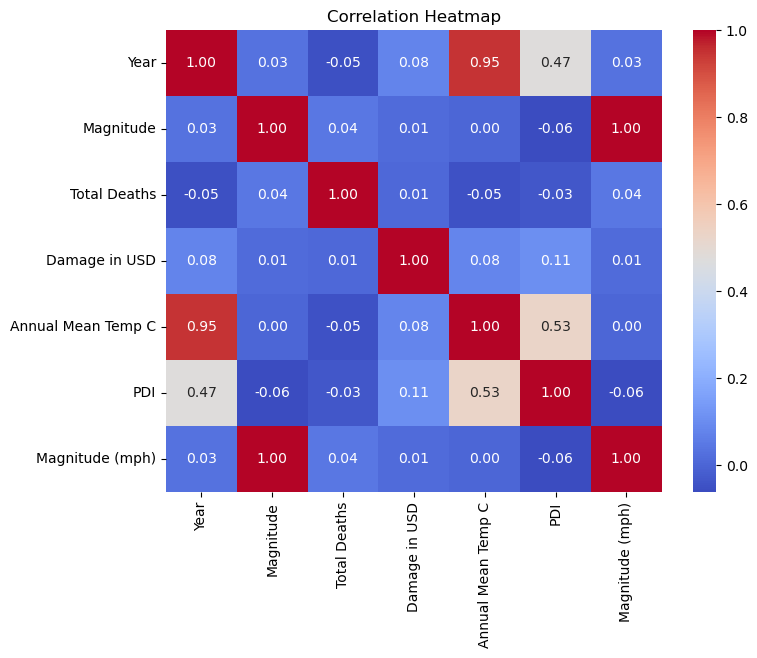

In [400]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = hurricanes.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Categorizing via Wind Speed/Magnitude

In [353]:
#Tornado Deaths
#Hurricane Deaths
import math
master['Magnitude (mph)'] = master['Magnitude']/1.609344
hurricanes = master[master['Disaster Subtype'] == 'Tropical cyclone']
tornados = master[master['Disaster Subtype'] == 'Tornado']

#creating a dictionary to hold values for hurricanes

custom_colors_canes = {
    "74mph or less": "rgb(95, 70, 144)",
    "74 to 95mph Cat. 1": "rgb(29, 105, 150)",  
    "96 to 110mph Cat. 2": "rgb(56, 166, 165)",
    "111 to 129mph Cat. 3": "rgb(115, 175, 72)",
    "130 to 156mph Cat. 4": "rgb(237,173, 8)",
    "156+ mph to 200mph Cat. 5": "rgb(225,124, 5)",
}

def classify_hurricanes(magnitude):
    if magnitude < 74:
        return list(custom_colors_canes.keys())[0]
    if 74 <= magnitude <= 95:
        return list(custom_colors_canes.keys())[1]
    elif 96 <= magnitude <= 110:
        return list(custom_colors_canes.keys())[2]
    elif 111 <= magnitude <= 129:
        return list(custom_colors_canes.keys())[3]
    elif 130 <= magnitude <= 156:
        return list(custom_colors_canes.keys())[4]
    elif magnitude > 156:
        return list(custom_colors_canes.keys())[5]
    elif math.isnan(magnitude):
        return list(custom_colors_canes.keys())[0]
    elif magnitude == 0.0:
        return list(custom_colors_canes.keys())[0]


    
#to be used later with plotly
list_of_nado_ratings = ["65 to 85mph EF0","86 to 110mph EF1","111 to 135mph EF2","136 to 165mph EF3","166 to 200mph EF4","200+ mph EF5","65mph or less"]

def classify_tornados(magnitude):
    if 65 <= magnitude <= 85:
        return list_of_nado_ratings[0]
    elif 86 <= magnitude <= 110:
        return list_of_nado_ratings[1]
    elif 111 <= magnitude <= 135:
        return list_of_nado_ratings[2]
    elif 136 <= magnitude <= 165:
        return list_of_nado_ratings[3]
    elif 166 <= magnitude <= 200:
        return list_of_nado_ratings[4]
    elif magnitude > 200:
        return list_of_nado_ratings[5]
    elif math.isnan(magnitude):
        return list_of_nado_ratings[6]
    elif magnitude == 0.0:
        return list_of_nado_ratings[6]


hurricanes['Classification'] = hurricanes['Magnitude (mph)'].apply(classify_hurricanes)

tornados['Classification'] = tornados['Magnitude (mph)'].apply(classify_tornados)
hurricanes

C:\Users\dcrai\AppData\Local\Temp\ipykernel_22220\2411434682.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dcrai\AppData\Local\Temp\ipykernel_22220\2411434682.py:63: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Disaster Type,Disaster Subtype,Magnitude,Magnitude Scale,Total Deaths,Event Name,ISO,Damage in USD,Annual Mean Temp C,PDI,Magnitude (mph),Classification
0,2005,Storm,Tropical cyclone,280.0,Kph,1833.0,Katrina,USA,1.873191e+11,0.67,5.1439,173.983934,156+ mph to 200mph Cat. 5
1,2017,Storm,Tropical cyclone,215.0,Kph,88.0,Hurricane Harvey,USA,1.134230e+11,0.92,4.5300,133.594806,130 to 156mph Cat. 4
2,2022,Storm,Tropical cyclone,240.0,Kph,152.0,Hurricane 'Ian',USA,1.000000e+11,0.89,NaN,149.129086,130 to 156mph Cat. 4
3,2017,Storm,Tropical cyclone,240.0,Kph,64.0,Hurricane 'Maria',PRI,8.118700e+10,0.92,4.5300,149.129086,130 to 156mph Cat. 4
4,2021,Storm,Tropical cyclone,240.0,Kph,96.0,Tropical storm 'Ida',USA,7.020182e+10,0.84,NaN,149.129086,130 to 156mph Cat. 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,2023,Storm,Tropical cyclone,NaN,Kph,NaN,Typhoon 'Lan',JPN,NaN,NaN,NaN,NaN,74mph or less
2656,2023,Storm,Tropical cyclone,80.0,Kph,3.0,Tropical storm 'Franklin',DOM,NaN,NaN,NaN,49.709695,74mph or less
2657,2023,Storm,Tropical cyclone,NaN,Kph,NaN,NaN,ARG,NaN,NaN,NaN,NaN,74mph or less
2658,2023,Storm,Tropical cyclone,NaN,Kph,46.0,NaN,BRA,NaN,NaN,NaN,NaN,74mph or less


array([1950, 1951, 1953, 1963, 1964, 1965, 1966, 1967, 1968, 1970, 1972,
       1973, 1974, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023])

## Creating Counts Chart for Stacked Bar

In [343]:
classification_counts = tornados.groupby('Year')['Classification'].value_counts().unstack(fill_value=0)
classification_counts = classification_counts.reset_index()

years = tornados['Year'].sort_values().unique()
all_years = pd.DataFrame({'Year': years})

nado_result = pd.merge(all_years, classification_counts, on='Year', how='left').fillna(0)

nado_result


,Year,111 to 135mph EF2,136 to 165mph EF3,166 to 200mph EF4,200+ mph EF5,65 to 85mph EF0,65mph or less,86 to 110mph EF1
0,1950,0,0,0,0,0,1,0
1,1951,0,0,0,0,0,1,0
2,1953,0,0,0,0,0,1,0
3,1963,0,0,0,0,0,1,0
4,1964,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
55,2019,0,0,1,0,0,5,2
56,2020,0,0,0,0,0,3,1
57,2021,0,0,1,0,0,7,0
58,2022,0,1,1,0,0,4,0


In [360]:
canes_counts = hurricanes.groupby('Year')['Classification'].value_counts().unstack(fill_value=0)
canes_counts = canes_counts.reset_index()

canes_years = hurricanes['Year'].sort_values().unique()
canes_years_all = pd.DataFrame({'Year': canes_years})

canes_result = pd.merge(canes_years_all, canes_counts, on='Year', how='left').fillna(0)

canes_result

,Year,111 to 129mph Cat. 3,130 to 156mph Cat. 4,156+ mph to 200mph Cat. 5,74 to 95mph Cat. 1,74mph or less,96 to 110mph Cat. 2
0,1950,0,0,0,0,2,0
1,1951,0,0,0,0,9,0
2,1952,0,0,0,0,4,0
3,1953,0,0,0,0,4,0
4,1954,0,3,0,0,6,0
...,...,...,...,...,...,...,...
69,2019,3,1,2,5,29,4
70,2020,5,4,3,8,51,8
71,2021,1,3,0,5,43,6
72,2022,1,3,0,8,36,1


## Tornado Wind Speed Occurences Over Time Original

Re-made this using graph.objects since I could not order the stacking of categories

In [309]:
#https://plotly.com/python/discrete-color/
# hovered over the "Prism" scale for rgb values

custom_colors = {
    "65mph or less": "rgb(95, 70, 144)",
    "65 to 85mph EF0": "rgb(29, 105, 150)",  
    "86 to 110mph EF1": "rgb(56, 166, 165)",
    "111 to 135mph EF2": "rgb(115, 175, 72)",
    "136 to 165mph EF3": "rgb(237,173, 8)",
    "166 to 200mph EF4": "rgb(225,124, 5)",
    "200+ mph EF5": "rgb(204, 80, 62)",
}

fig = px.bar(result, 
             x="Year", y=list_of_nado_ratings,
             title="Test",
            color_discrete_map=custom_colors)



fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020],
        ticktext = ["1950", "1960", "1970", "1980", "1990", "2000", "2010", "2020"]
    )
)

fig.update_xaxes(categoryorder='total ascending')


fig.show()

In [331]:
print(list(custom_colors.keys())[0])
print(list(custom_colors.values())[0])

65mph or less
rgb(95, 70, 144)


In [349]:
import plotly.graph_objects as go
#https://plotly.com/python/bar-charts/


x= nado_result['Year']
fig = go.Figure(go.Bar(name= list(custom_colors.keys())[0],x=x, y=result[list(custom_colors.keys())[0]],
                marker_color = list(custom_colors.values())[0]))

fig.add_trace(go.Bar(name = list(custom_colors.keys())[1],x=x, y=result[list(custom_colors.keys())[1]],  marker_color = list(custom_colors.values())[1]))
fig.add_trace(go.Bar(name = list(custom_colors.keys())[2],x=x, y=result[list(custom_colors.keys())[2]],  marker_color = list(custom_colors.values())[2]))
fig.add_trace(go.Bar(name = list(custom_colors.keys())[3],x=x, y=result[list(custom_colors.keys())[3]],  marker_color = list(custom_colors.values())[3]))
fig.add_trace(go.Bar(name = list(custom_colors.keys())[4],x=x, y=result[list(custom_colors.keys())[4]],  marker_color = list(custom_colors.values())[4]))
fig.add_trace(go.Bar(name = list(custom_colors.keys())[5],x=x, y=result[list(custom_colors.keys())[5]],  marker_color = list(custom_colors.values())[5]))
fig.add_trace(go.Bar(name = list(custom_colors.keys())[6],x=x, y=result[list(custom_colors.keys())[6]],  marker_color = list(custom_colors.values())[6]))



fig.update_layout(title = "Tornado Wind Speed Occurences Over Time (1950 - 2023)", 
                  yaxis=dict(title='Occurences',titlefont_size=16,tickfont_size=14),
                  xaxis=dict(title='Year',titlefont_size=16,tickfont_size=14),
                  barmode='stack')

fig.show()

In [356]:
custom_colors_canes

{'74mph or less': 'rgb(95, 70, 144)',
 '74 to 95mph Cat. 1': 'rgb(29, 105, 150)',
 '96 to 110mph Cat. 2': 'rgb(56, 166, 165)',
 '111 to 129mph Cat. 3': 'rgb(115, 175, 72)',
 '130 to 156mph Cat. 4': 'rgb(237,173, 8)',
 '156+ mph to 200mph Cat. 5': 'rgb(225,124, 5)'}

In [362]:
import plotly.graph_objects as go
#https://plotly.com/python/bar-charts/


x= canes_result['Year']
fig = go.Figure(go.Bar(name= list(custom_colors_canes.keys())[0],x=x, y=canes_result[list(custom_colors_canes.keys())[0]],
                marker_color = list(custom_colors_canes.values())[0]))

fig.add_trace(go.Bar(name = list(custom_colors_canes.keys())[1],x=x, y=canes_result[list(custom_colors_canes.keys())[1]],  marker_color = list(custom_colors_canes.values())[1]))
fig.add_trace(go.Bar(name = list(custom_colors_canes.keys())[2],x=x, y=canes_result[list(custom_colors_canes.keys())[2]],  marker_color = list(custom_colors_canes.values())[2]))
fig.add_trace(go.Bar(name = list(custom_colors_canes.keys())[3],x=x, y=canes_result[list(custom_colors_canes.keys())[3]],  marker_color = list(custom_colors_canes.values())[3]))
fig.add_trace(go.Bar(name = list(custom_colors_canes.keys())[4],x=x, y=canes_result[list(custom_colors_canes.keys())[4]],  marker_color = list(custom_colors_canes.values())[4]))
fig.add_trace(go.Bar(name = list(custom_colors_canes.keys())[5],x=x, y=canes_result[list(custom_colors_canes.keys())[5]],  marker_color = list(custom_colors_canes.values())[5]))




fig.update_layout(title = "Hurricane Wind Speed Occurences Over Time (1950 - 2023)", 
                  yaxis=dict(title='Occurences',titlefont_size=16,tickfont_size=14),
                  xaxis=dict(title='Year',titlefont_size=16,tickfont_size=14),
                  barmode='stack')

fig.show()

In [433]:
#Legend Group Gap to separate the legends from each other since make_subplot can only handle one
# we group the legend into two groups and place a gap between them with 
#fig.add_trace(go.Bar(legendgroup = '1'))
#fig.add_trace(go.Bar(legendgroup = '2'))
#fig.update_layout(legend_tracegroupgap = 85)
#https://www.kaggle.com/code/jrmistry/plotly-how-to-make-individual-legends-in-subplot/notebook

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with two rows and one column
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05)

# Add bar traces for tornado data
x_tornado = nado_result['Year']
for i, color in enumerate(list(custom_colors.keys())):
    fig.add_trace(go.Bar(
        name=color,
        x=x_tornado,
        y=nado_result[color],
        legendgroup = '1',
        marker_color=list(custom_colors.values())[i]
    ), row=1, col=1)

# Add bar traces for hurricane data
x_hurricane = canes_result['Year']
for i, color in enumerate(list(custom_colors_canes.keys())):
    fig.add_trace(go.Bar(
        name=color,
        x=x_hurricane,
        y=canes_result[color],
        legendgroup = '2',
        marker_color=list(custom_colors_canes.values())[i]
    ), row=2, col=1)

# Update the layout
fig.update_layout(
    title="Wind Speed Occurrences Over Time (1950 - 2023)",
    yaxis1=dict(title='Tornadoes', titlefont_size=16, tickfont_size=14),
    yaxis2=dict(title='Hurricanes', titlefont_size=16, tickfont_size=14),
    legend_tracegroupgap = 85,
    barmode='stack'
)

# Show the subplot figure
fig.show()


## Deaths by Year

In [98]:
master[master['Year'] == 2008]

,Year,Disaster Type,Disaster Subtype,Magnitude,Magnitude Scale,Total Deaths,Event Name,ISO,Damage in USD,Annual Mean Temp C,PDI
8,2008,Storm,Tropical cyclone,200.0,Kph,82.0,Hurricane Ike,USA,4.077819e+10,0.54,2.6936
37,2008,Storm,Tropical cyclone,NaN,Kph,43.0,"Hurricane ""Gustav""",USA,9.514910e+09,0.54,2.6936
64,2008,Storm,Tropical cyclone,215.0,Kph,138366.0,Cyclone 'Nargis',MMR,5.437091e+09,0.54,2.6936
136,2008,Storm,Tropical cyclone,240.0,Kph,NaN,"Hurricane ""Gustav""",CUB,2.816413e+09,0.54,2.6936
171,2008,Storm,Tornado,320.0,Kph,7.0,NaN,USA,2.174837e+09,0.54,2.6936
...,...,...,...,...,...,...,...,...,...,...,...
2260,2008,Storm,Tropical cyclone,NaN,Kph,NaN,"Hurricane ""Omar""",ATG,NaN,0.54,2.6936
2261,2008,Storm,Tropical cyclone,NaN,Kph,NaN,"Hurricane ""Omar""",KNA,NaN,0.54,2.6936
2262,2008,Storm,Tropical cyclone,NaN,Kph,1.0,"TRopical storm ""Higos"" (Pablo)",PHL,NaN,0.54,2.6936
2263,2008,Storm,Tropical cyclone,100.0,Kph,12.0,NaN,BGD,NaN,0.54,2.6936


In [100]:

#plotly version
import plotly.express as px
import plotly.graph_objects as go


grouped = master.groupby('Year').agg({'Total Deaths': 'sum', 'Disaster Type': 'count', 'Annual Mean Temp C': 'first'})
grouped = grouped.rename(columns={'Total Deaths': 'Total Deaths', 'Disaster Type': 'Count of Storms', 'Annual Mean Temp C':'Global Temp(C) Change'})

# Create a scatter plot with Plotly
fig = px.scatter(grouped, x=grouped.index, y='Count of Storms', size='Total Deaths', size_max=10, color='Global Temp(C) Change', 
                 labels={'Count of Storms': 'Count of Storms', 'Total Deaths': 'Total Deaths'})


fig.update_traces(marker=dict(sizemode='diameter'))

fig.add_trace(go.Scatter(x=[1940], y=[40], mode='markers', marker=dict(size=2, color = 'grey'), text ='$1 billion', showlegend= False))
fig.add_trace(go.Scatter(x=[1940], y=[55], mode='markers', marker=dict(size=15, color = 'grey'), text='$50 billion', textposition='top center', showlegend= False))
fig.add_trace(go.Scatter(x=[1940], y=[70], mode='markers', marker=dict(size=40, color = 'grey'), text='$100 billion', showlegend= False))
fig.add_trace(go.Scatter(x=[1940], y=[100], mode='markers', marker=dict(size=100, color = 'grey'), text ='$300 billion', showlegend= False))

note_temp_change_1 = go.layout.Annotation(
    text="Note: Temp Change is based on",
    x=.65,
    y=.1,
    showarrow=False,
    xanchor="left",
    xshift=10,
    xref = 'paper',
    yref = 'paper',
    font=dict(size=10,color = 'black')
)
fig.add_annotation(note_temp_change_1)

note_temp_change_2 = go.layout.Annotation(
    text="difference from 100yr avg from 1901 - 2000",
    x=.65,
    y=.05,
    showarrow=False,
    xanchor="left",
    xshift=10,
    xref = 'paper',
    yref = 'paper',
    font=dict(size=10,color = 'black')
)
fig.add_annotation(note_temp_change_2)

#size to cost legend
size_legend_text = go.layout.Annotation(
    text="Size to Death Count",
    x=1925,
    y=125,
    showarrow=False,
    xanchor="left",
    xshift=10,
    font=dict(size=14)
)
fig.add_annotation(size_legend_text)


#1950, 115 small circle annotation
mega_small_size = go.layout.Annotation(
    text="~10,000 Deaths",
    x=1940,
    y=40,
    showarrow=False,
    xanchor="left",
    xshift=20,
    font=dict(size=14)
)
fig.add_annotation(mega_small_size)

#1950, 115 small circle annotation
small_size = go.layout.Annotation(
    text="~50,000 Deaths", 
    x=1940,
    y=55,
    showarrow=False,
    xanchor="left",
    xshift=20,
    font=dict(size=14)
)
fig.add_annotation(small_size)

#1950, 115 medium circle annotation
med_size = go.layout.Annotation(
    text="~150,000 Deaths", 
    x=1942,
    y=70,
    showarrow=False,
    xanchor="left",
    xshift=20,
    font=dict(size=14)
)
fig.add_annotation(med_size)

#1950, 115 large circle annotation
large_size = go.layout.Annotation(
    text="~300,000 Deaths",
    x=1946,
    y=100,
    showarrow=False,
    xanchor="left",
    xshift=20,
    font=dict(size=14)
)
fig.add_annotation(large_size)


bhola = go.layout.Annotation(
    text="Bhola Cyclone",
    x=1970,
    y=19,
    ax = 30,
    ay = -50,
    showarrow=True,
    xanchor="left",
    font=dict(size=14)
)
fig.add_annotation(bhola)

bang = go.layout.Annotation(
    text="Bangladesh 'Gorky' Cyclone",
    x=1991,
    y=38,
    ax = 30,
    ay = -50,
    showarrow=True,
    xanchor="left",
    font=dict(size=14)
)
fig.add_annotation(bang)

bang = go.layout.Annotation(
    text="Nargis Cyclone",
    x=2008,
    y=84,
    ax = 30,
    ay = -50,
    showarrow=True,
    xanchor="left",
    font=dict(size=14)
)
fig.add_annotation(bang)


fig.update_layout(title='Hurricane/Tornado Related Deaths and Storm Count vs Temperature', 
                  xaxis_title='Year', 
                  yaxis_title='Count of Storms',
                  font = dict(color='black',size = 10,family = 'Arial Black'))

fig.show()

## Temperature over Time

In [45]:
anomalies = pd.read_csv(r"data\Land-Ocean Anomaly 1850.csv")
anomalies

,Year,Anomaly
0,1850,-0.18
1,1851,0.02
2,1852,-0.01
3,1853,-0.10
4,1854,-0.05
...,...,...
169,2019,0.97
170,2020,0.98
171,2021,0.92
172,2022,0.90


In [108]:
import plotly.graph_objects as go
import numpy as np
#https://plotly.com/python/bar-charts/
#https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series

x = anomalies['Year']
y= anomalies['Anomaly']
color = temp_int['Color']
fig = go.Figure(go.Bar(name= 'Global Land and Ocean Temperature Change',x=x, y=y, marker=dict(
            color=np.cos(y / .35),
            colorscale="Bluered_r",
            showscale=False,
            colorbar=dict(title="value")))
               )

note_temp_change_1 = go.layout.Annotation(
    text="Note: Change in average temperature is based on the difference",
    x=1860,
    y=1.25,
    showarrow=False,
    xanchor="left",
    font=dict(size=10,color = 'black')
)
fig.add_annotation(note_temp_change_1)

note_temp_change_2 = go.layout.Annotation(
    text="from the 100yr temperature average 1901 - 2000",
    x=1860,
    y=1.19,
    showarrow=False,
    xanchor="left",
    font=dict(size=10,color = 'black')
)
fig.add_annotation(note_temp_change_2)

note_temp_change_2 = go.layout.Annotation(
    text="Data Source: National Centers for Environmental Information",
    x=1860,
    y=1.35,
    showarrow=False,
    xanchor="left",
    font=dict(size=10,color = 'black')
)
fig.add_annotation(note_temp_change_2)


fig.update_layout(title = "Global Land-Ocen Temperature Change by Year", 
                  yaxis=dict(title='Change in Average Temperature',titlefont_size=16,tickfont_size=14),
                  xaxis=dict(title='Year',titlefont_size=16,tickfont_size=14),
                  barmode='stack')

fig.show()